The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


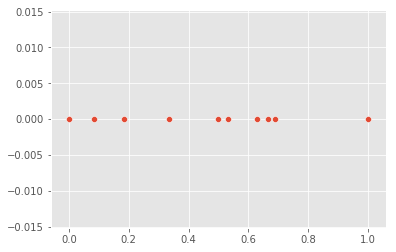

In [30]:

import math
import json
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

%load_ext autoreload
%autoreload 2


n = 10
r = 1.

# x = np.linspace(0,r,num=n)
x = np.sort(np.absolute(np.random.sample(n)))


x[0]  = 0.
x[-1] = r


dist_neighbour = r/(n-1)

dx = np.zeros(n) 

def evolve(x, dx):
    
    for i_ in np.random.permutation(n-2):
        i  = i_ + 1
        dt = 0.0001
        dx[i] += -dt*( x[i]   - x[i-1] - dist_neighbour)
        dx[i] -= -dt*( x[i+1] - x[i]   - dist_neighbour)
    
        x[i] += dt * dx[i]
        if x[i] > x[i+1]:
            x[i] = x[i+1]
        elif x[i] < x[i-1]:
            x[i] = x[i-1]
            
    return x, dx



def evolveb(x, dx):
    
    for i_ in np.random.permutation(n-2):
        i = i_ + 1
        dt = 0.01
        dx += -.0001*(x - 0.5)
        

        x += dt * dx
    return x, dx


plt.style.use('ggplot')
plt.scatter(x, np.zeros(n), edgecolor="white")


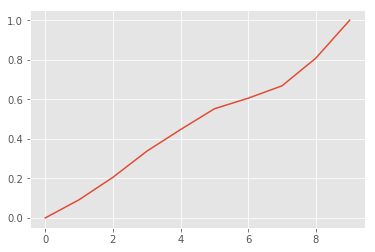

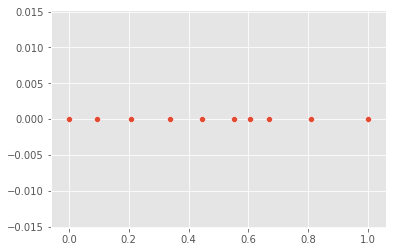

In [31]:
T = 10000

X = np.zeros((T,n))
DX = np.zeros((T,n))
# X = np.zeros((T))
# DX = np.zeros((T))
X[0]  = x
DX[0] = 0.
for t in range(1,T):
    x  = X[t-1]
    dx = DX[t-1]
    x, dx = evolve(x,dx)
    X[t] = x
    DX[t] = dx
    
# plt.plot(X[:,n//2])
# plt.plot(X[:,2])
plt.plot(X[-100,:])
plt.show()

plt.scatter(X[-1], np.zeros(n), edgecolor="white")



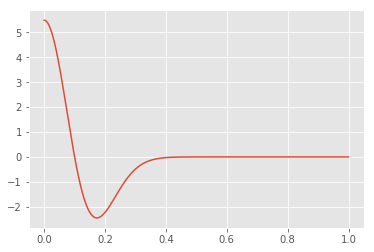

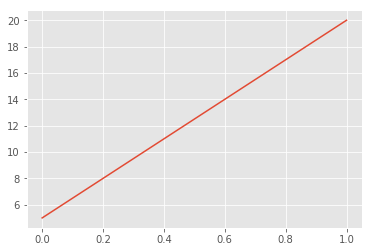

In [32]:
from htmresearch.support.cans.utils import *

def mexican_hat(x, sigma=0.1):
    a = 2./ ( np.sqrt(3*sigma) * np.power(np.pi,0.25 ) )
    b = (1. - (x/sigma)**2 )
    c = np.exp( - x**2/(2.*sigma**2))
    return a*b*c


def W_zero(x):
    a          = 1.0
    lambda_net = 4.0
    beta       = 100.*3.0 / lambda_net**2
    gamma      = 1.05 * beta
    
    x_length_squared = x**2
    
    return a*np.exp(-gamma*x_length_squared) - np.exp(-beta*x_length_squared)




J = mexican_hat
# J = W_zero

def mexican_force(d):
    return 2.*J(d)


def boosting_force(x):    
    return 5. + 15.*x

x = np.linspace(0.,1., num=1000)
plt.plot(x, mexican_force(x))
plt.show()

x = np.linspace(0.,1., num=1000)
plt.plot(x, boosting_force(x))
plt.show()

f = mexican_force(x)
# print x[ np.where(f[:-1] > 0 and f[1:] <0 )[0]]

# B = np.where( (f[:-1] > 0.)* (f[1:] <0.))[0]
# B = int(B)
# print B
# print np.sum(f[:]/len(x) )
# print x[ B ]
# print x[ np.where( (f[:-1] > 0.)* (f[1:] <0.))[0] +1]
# # plt.plot(x, boosting_force(x))


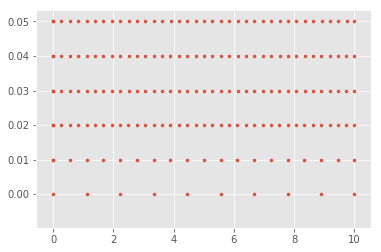

In [33]:
# r = 8.


r = 10.


def birth_and_death(X, dX):
    

    D = np.absolute(X[1:] - X[:-1])
    
    kill      = 0.05
    resurrect = 0.3
    deaths    = np.where(D < kill)[0]
    keep      = np.where(D >= kill)[0]
    births    = np.where(D > resurrect)[0]
    
    keep = keep.tolist() + [0,-1]
    
    X_ = np.concatenate([
        X[births] + D[births]*0.5,
        X[keep]
    ])
    
    dX_ = np.concatenate([
        np.zeros(len(births)),
        dX[keep]
    ])
    order = np.argsort(X_)
    X_  = X_[order]
    dX_ = dX_[order]
    return X_, dX_




def evolve(x, dx):    
    dt = 0.005
    n  = x.shape[0]  # Number of paricles
    
    perm = np.random.permutation(np.arange(1,n-1))
    for i in perm:
    
        i_L = i-1
        i_R = i+1
        d_L  = abs(x[i_L] - x[i])
        d_R  = abs(x[i_R] - x[i])
        f_L = mexican_force(d_L)
        f_R = mexican_force(d_R)
        dx[i]  = dt*f_L
        dx[i] -= dt*f_R
        dx[i] += dt*boosting_force(x[i])
        
        x[i]  += dt*dx[i]
        x[i]   = np.clip(x[i], 0.000001,r - 0.000001)
        
    x = np.sort(x)
    x, dx = birth_and_death(x, dx)
    x[0]  = 0.
    x[-1] = r
        
    return x, dx



T = 20000
n = 10
X = []
dX = []
# x = np.sort(np.absolute(np.random.sample(n)))
x = np.linspace(0.,r, num=n)
dx = np.zeros(n)
x[0]  = 0.
x[-1] = r
X.append(x[:])
dX.append(dx[:])
for t in range(1,T):

    x, dx = evolve(x,dx)
    X.append(x[:])
    dX.append(dx[:])

    
for t in range(0,6):
    plt.scatter(X[t], np.zeros(len(X[t])) + t*0.01, color="C0", marker=".")

#     t = -1
#     print len(X[t])
#     plt.scatter(X[t], np.zeros(len(X[t])), edgecolor="white")



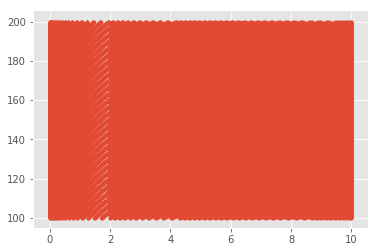

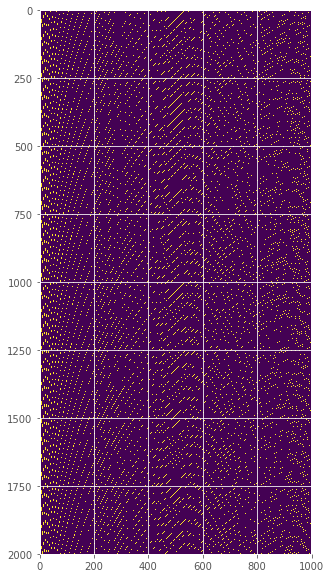

In [35]:

rows = []

res = 1000
for t in np.arange(10000,20000, step=5):
    rows.append((X[t]/r*(res - 1)).astype(int).tolist())
    plt.scatter(X[t], np.zeros(len(X[t])) + t*0.01, color="C0", marker=".")
plt.show()

img = np.zeros((len(rows), res))
for i,row in enumerate(rows):
    img[i, row] = 1.

img = img[::-1]

plt.figure(figsize=(20,10))
plt.imshow(img)

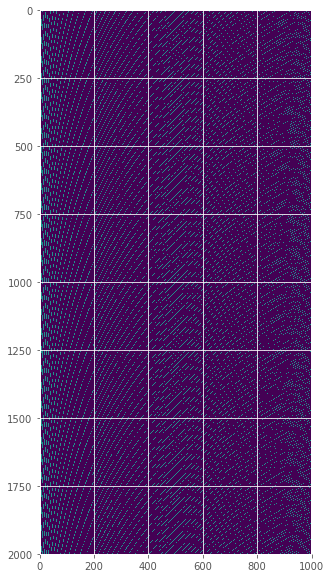

In [36]:
img = np.zeros((len(rows), res))
for i,row in enumerate(rows):
    img[i, row] = 1.

img = img[::-1]
for i in range(2):
    img += np.roll(img, i, axis=1)

plt.figure(figsize=(20,10))
plt.imshow(img)

In [37]:
W = img

pc, gc = W.shape


scales = np.zeros(gc)
for i in range(gc):
    f = 0. + (W[:,i] > 0.5)
    df = f[1:] - f[:-1]
    ind = np.where(df == -1.)[0]
    ind = ind.astype(float)
    if len(ind) > 1:
        scales[i] = np.mean(ind[1:] - ind[:-1])
    else:
        scales[i] = 0.
    
# np.clip(scales, 0, 100, scales);

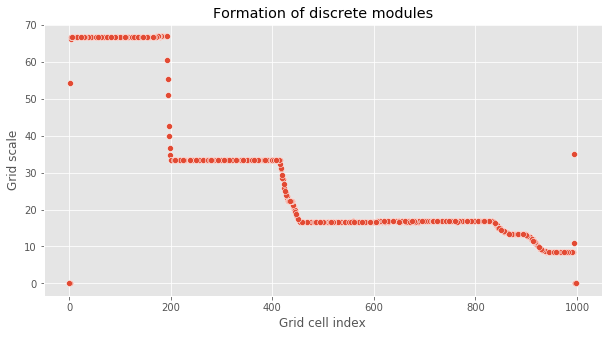

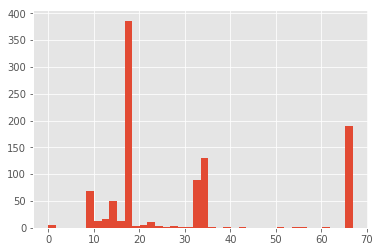

In [39]:
pc_inter_spacing = 1.
plt.figure(figsize=(10,5))
plt.title("Formation of discrete modules")
perm  = np.random.permutation(gc)
plt.scatter(np.arange(gc)[perm], scales[perm]*pc_inter_spacing, color="C0" ,edgecolor="white", marker="o", zorder=2.)

plt.xlabel("Grid cell index")
plt.ylabel("Grid scale")
plt.show()

plt.hist(scales, bins=40);